# M1770: Polaronic effects in titanates studied with β-NMR - run plan (2020-09-27)

[https://mis.triumf.ca/science/experiment/view/M1770](https://mis.triumf.ca/science/experiment/view/M1770)

## Introduction

The goal is to look for direct evidence of implanted <sup>8</sup>Li<sup>+</sup> binding to polaronic Ti<sup>3+</sup> defects (i.e., forming a neutral Li-polaron complex) in rutile TiO<sub>2</sub> using resonance measurements.

An initial search was made in 2017 to observe the ENDOR-like resonances (i.e., a pair of "satellite" lines centered about the Larmor frequency, caused by the hyperfine splitting of the <sup>8</sup>Li line from the dipole coupling of the unpaired electron in Ti<sup>3+</sup> to <sup>8</sup>Li). For this, a high-quality rutile TiO<sub>2</sub> (001) crystal was used. No lines with a large hyperfine splitting were observed, though the search was not exhaustive. In this attempt, we make several improvements over our last:

* We will use a TiO<sub>2-x</sub> crystal, where the polaron density is much higher - enough to visibly alter the sample colour.
* We will exploit the recently developed capability of applying frequency combs, which will allow us to hit all hyperfine transitions simultaneously.
* We will try several temperatures between 5 K and 50 K.


## Li<sup>+</sup>-Ti<sup>3+</sup> polaron complex

What is known about the Li-polaron complex comes from EPR/ENDOR experiments using stable <sup>7</sup>Li, which can be found at [https://doi.org/10.1063/1.4790366](https://doi.org/10.1063/1.4790366). The most relevent information I reproduce below.

### ENDOR

![](figures/published/2013-Brant-JAP-113-053712/Figure5.png)
<sup>7</sup>Li ENDOR of the Li-polaron complex in rutile TiO<sub>2</sub> at 20 K and 352.42 mT || the <i>c</i>-axis. The midpoint of the two lines is 5.85 MHz, which is very close to the Larmor frequency of <sup>7</sup>Li (5.83 MHz) at this field. The 2.15 MHz splitting of the two lines corresponds to a hyperfine field of 0.081 mT.

It is also stated in the paper that the electric quadrupole interaction is too weak to be resolved in the EPR/ENDOR measurements.

### EPR

![](figures/published/2013-Brant-JAP-113-053712/Figure6.png)
Angular dependence of the <sup>7</sup>Li hyperfine splitting of the Li-polaron complex in rutile TiO<sub>2</sub> determined from EPR (i.e., the average inter- and intra-splittings of the EPR quartets).


## Coarse plan

* Use the rutile TiO<sub>2-x</sub> (100) crystal (reduced in H<sub>2</sub>/Ar atmosphere by R. Merkel @ MPI-FKF). The crystal is a deep blue colour and easy to distinguish from stoichiometric rutile. Its dimensions are approximately 8 mm x 8 mm x 0.5 mm, meaning it will likely only be clamped on one side of the NMR holder. It is sitting on top of my desiccator in the bnmr clean room.
* Based on the <sup>7</sup>Li hyperfine splitting in the (100) orientation, we expect two sets of peaks (calculated below):

nu_hf_1 / 2 = 683139 Hz
nu_hf_2 / 2 = 421625 Hz
(nu_hf_1 - nu_hf_2) / 2 = 261514 Hz


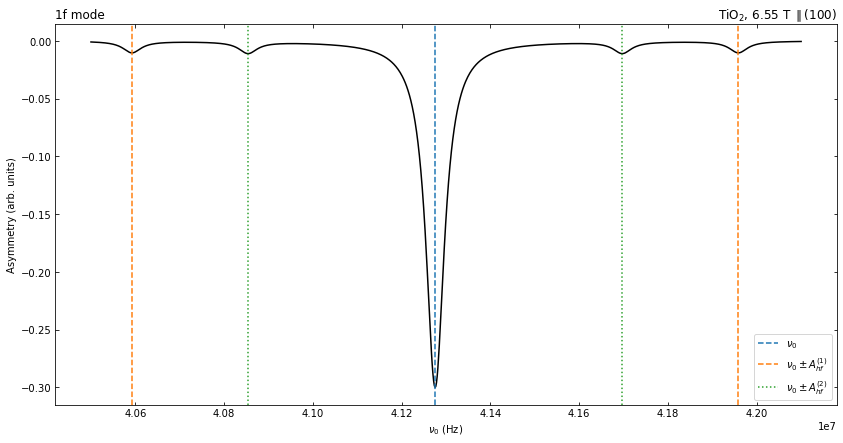

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# gyromagnetic ratio of Li isotopes (Hz/T)
gamma_7Li = 16.545e6
gamma_8Li = 6.3016e6
gamma_e = 28024.9514242e6

# ratio of Li gammas
r = gamma_8Li / gamma_7Li

# 7Li hyperfine splitting (mT) - estimated from the above figure
B_hf_1 = 0.128
B_hf_2 = 0.079

# calculated hyperfine frequencies (Hz) - using the ratio of the 8Li/7Li gammas 
nu_hf_1 = gamma_e * B_hf_1 * 1e-3 * r
nu_hf_2 = gamma_e * B_hf_2 * 1e-3 * r

# print the values for using later on
print("nu_hf_1 / 2 = %.0f Hz" % (nu_hf_1 / 2))
print("nu_hf_2 / 2 = %.0f Hz" % (nu_hf_2 / 2))
print("(nu_hf_1 - nu_hf_2) / 2 = %.0f Hz" % ((nu_hf_1 - nu_hf_2) / 2))

# applied magnetic field
B_0 = 6.55

# 8Li Larmor frequency
nu_0 = gamma_8Li * B_0

# create the figure for 1f mode cartoon
fig1, ax1 = plt.subplots(1, 1, figsize=(14, 7))

ax1.set_title(r"1f mode", loc="left")
ax1.set_title(r"TiO$_{2}$, 6.55 T $\parallel (100)$", loc="right")

ax1.set_xlabel(r"$\nu_{0}$ (Hz)")
ax1.set_ylabel(r"Asymmetry (arb. units)")

# Larmor frequency location
ax1.axvline(nu_0, linestyle="--", color="C0", label=r"$\nu_{0}$")

# 1st hyperfine splitting pair location
ax1.axvline(nu_0 - nu_hf_1 / 2, linestyle="--", color="C1", label=r"$\nu_{0} \pm A_{hf}^{(1)}$")
ax1.axvline(nu_0 + nu_hf_1 / 2, linestyle="--", color="C1")

# 2nd hyperfine splitting pair location
ax1.axvline(nu_0 - nu_hf_2 / 2, linestyle=":", color="C2", label=r"$\nu_{0} \pm A_{hf}^{(2)}$")
ax1.axvline(nu_0 + nu_hf_2 / 2, linestyle=":", color="C2")

# Lorentzian function for plotting a cartoon resonance line
def lor(x, x_0, fwhm, amp):
    gamma = fwhm / 2
    return amp / (1 + ((x - x_0) / gamma)**2)

# sample frequencies
f = np.linspace(40.5e6, 42.1e6, 1000)

# cartoon resonance line
# "regular" line near nu_0
s = lor(f, nu_0, 0.05e6, -0.3)
# 1st pair of hyperfine splittings
s += lor(f, nu_0 - nu_hf_1 / 2, 0.05e6, -0.01)
s += lor(f, nu_0 + nu_hf_1 / 2, 0.05e6, -0.01)
# 2nd pair of hyperfine splittings
s += lor(f, nu_0 - nu_hf_2 / 2, 0.05e6, -0.01)
s += lor(f, nu_0 + nu_hf_2 / 2, 0.05e6, -0.01)

# cartoon resonance line
ax1.plot(f, s, "-", color="black", zorder=1)

ax1.legend()

plt.show()

* note the above "cartoon" plot in all likelihood embellishes the amplitude/width of the "polaron" peaks.
* the most efficient/likely way of seeing a resonance involing the peaks is using the comb method (i.e., 1w mode). The four frequencies could be programmed as:
    * frq0: x - a
    * frq1: x + a
    * frq2: x - b
    * frq3: x + b
* in these expressions, a = nu_hf_1 / 2 and b = nu_hf_2 / 2, as calculated/printed above (note that you will have to enter these number explicitly into the PPG parameter input boxes).
* using this, I would scan x around the <sup>8</sup>Li Larmor frequency (41.27 MHz). Ideally, a single (broad and weak?) resonance peak should appear. Suggested starting paramaters for scanning:
    * x start: 41.140 MHz
    * x stop: 41.310 MHz
    * x step: 5 kHz
* all resonance measurements should be done w/ maximum RF power.


## Detailed plan
* At each temperature, take a regular 1f and a 1w resonance. The 1f, especially at low-T, will be large/broad and shouldn't take much time. Temperatures to try (in descending order of importance) are:
    * 25 K
    * 15 K
    * 5 K
    * 35 K
    * 45 K
    * 80 K
    * 300 K